In [1]:
import pandas as pd
import numpy as np

INPUT:
CSV file with the headers ("Chance_of_Attendance,Party_Size") on the first line.  Each line then contains two values separated by a comma.  The first value is the chance of that guest party attending the wedding.  The second number is the total number of people in that guest party (single, couple, family).

ASSUMPTIONS:
Either the whole party attends, or none of the party attends.

In [2]:
df = pd.read_csv('wedding_guests.csv')

num_simulations = 1000
sim_results = []

for i in range(num_simulations):
  df['Attending?'] = df.apply(lambda row: np.random.choice([1,0],p=[row.Chance_of_Attendance, 1-row.Chance_of_Attendance]),axis=1)

  df['Attending_Size'] = df['Party_Size'] * df['Attending?']

  sim_results.append([
  df['Attending?'].sum(),
  df['Attending_Size'].mean(),
  df['Attending_Size'].sum().round(0)])

  results_df = pd.DataFrame.from_records(sim_results, columns=['Parties Attending','Average Party Size','Total Attendees'])

In [3]:
results_df.describe().style.format(precision=2)

,Parties Attending,Average Party Size,Total Attendees
count,1000.00,1000.00,1000.00
mean,59.86,1.21,102.94
std,3.34,0.07,6.11
min,50.00,0.99,84.00
25%,58.00,1.16,99.00
50%,60.00,1.21,103.00
75%,62.00,1.26,107.00
max,69.00,1.41,120.00


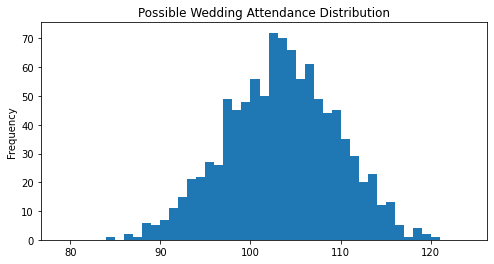

In [4]:
bin_sizing = range(results_df['Total Attendees'].min()-5,results_df['Total Attendees'].max()+5,1)

ax = results_df['Total Attendees'].plot(kind='hist', title="Possible Wedding Attendance Distribution", xlabel="Attendees", ylabel='Frequency in 1000 Simulations', bins=bin_sizing, figsize=(8,4))